In [ ]:
!unzip data_gan.zip

Streaming output truncated to the last 5000 lines.
  inflating: home/gsq_rmutalova/alex/A019/10c86485-4aa4-4e8f-becc-8078ef4c7ad6.png  
  inflating: home/gsq_rmutalova/alex/A019/dd68f3b6-0848-4880-84f7-50edff2c3acc.png  
  inflating: home/gsq_rmutalova/alex/A019/14653818-276e-4dfc-b966-f74d85cadd6f.png  
  inflating: home/gsq_rmutalova/alex/A019/ec341471-a4c5-43a4-8550-7e8943dde092.png  
  inflating: home/gsq_rmutalova/alex/A019/6f22f568-a8cd-4a89-8b79-3b40ff5702cd.png  
  inflating: home/gsq_rmutalova/alex/A019/46e5b8f0-1b23-4f00-828b-dd6490e208b9.png  
  inflating: home/gsq_rmutalova/alex/A019/2b6206cc-19d2-4611-b07d-9deb65061070.png  
  inflating: home/gsq_rmutalova/alex/A019/03144ec6-82a2-4d2e-8022-74aa79016efc.png  
  inflating: home/gsq_rmutalova/alex/A019/3b653597-0e28-4cc8-9ae8-19ce809ad2df.png  
  inflating: home/gsq_rmutalova/alex/A019/20c39286-7baa-4ef4-bcdf-4761b44d214c.png  
  inflating: home/gsq_rmutalova/alex/A019/839ca800-6fe7-455f-8673-4af182ce9a4d.png  
  inflating: h

In [1]:
import tensorflow as tf

import os
import pathlib
import time
import datetime

from matplotlib import pyplot as plt
from IPython import display
import numpy as np

import cv2
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
import tensorflow as tf

class ImagePreprocessor:
    def __init__(self, input_dir, output_dir, image_size=(2048, 2048), batch_size = 4):
        self.input_dir = input_dir
        self.output_dir = output_dir
        self.image_size = image_size
        self.batch_size = batch_size


    def load_and_preprocess_image(self, path):
        image = tf.io.read_file(path)
        image = tf.io.decode_jpeg(image, channels=1)
        image = (image / 255)
        image = tf.cast(image, tf.float32)
        image = tf.image.resize(image, (512,512),
                                method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
        return image

    def make_dataset(self):
        input_paths_ds = tf.data.Dataset.list_files(self.input_dir, shuffle=False)
        output_paths_ds = tf.data.Dataset.list_files(self.output_dir, shuffle=False)

        input_image_ds = input_paths_ds.map(self.load_and_preprocess_image)
        output_image_ds = output_paths_ds.map(self.load_and_preprocess_image)

        image_ds = tf.data.Dataset.zip((input_image_ds, output_image_ds))
        image_ds = image_ds.batch(self.batch_size)

        return image_ds

    def show_example(self):
        for input_image, output_image in self.make_dataset().take(1):
            plt.figure(figsize=(10, 10))
            plt.subplot(1, 2, 1)
            plt.imshow(input_image[0], cmap = 'Greys')
            plt.axis('off')

            plt.subplot(1, 2, 2)
            plt.imshow(output_image[0], cmap = 'Greys')
            plt.axis('off')
            plt.show()

    def show_tensor(self):
        dataset = self.make_dataset().take(1)
        example = next(iter(dataset))
        input_image, output_image = example
        input_image = input_image[0]
        output_image = output_image[0]
        return input_image, output_image
    def get_dataset_length(self):
        return len(list(tf.data.Dataset.list_files(self.input_dir, shuffle=False)))

    def split_dataset(self, train_fraction=0.8):
        total_samples = self.get_dataset_length()
        num_train_samples = int(total_samples * train_fraction)

        train_dataset = self.make_dataset().take(num_train_samples)
        test_dataset = self.make_dataset().skip(num_train_samples)

        return train_dataset, test_dataset


In [4]:
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [6]:
import os
print(os.listdir('A019'))  # This should list the files in the pics directory
print(os.listdir('consensus_clean'))

['.DS_Store', '.ipynb_checkpoints', '00595615-38df-4a0c-9d1f-de92429b4cd3.png', '00a5bb8d-3a07-48be-8ff5-84463b1eb356.png', '00b02685-67fb-412c-a603-84d95628047f.png', '00c6ca2c-30df-40c5-a8d6-bb35cc16ef73.png', '010f8e63-6db3-4509-8e77-4bf85a6141fd.png', '0159445d-be84-49ac-8ae4-a956822a6c26.png', '01a6909c-5053-4943-bff1-795d42b64e95.png', '01df1d1a-f476-4c18-8a9d-abac8c20f1b4.png', '0239b6c0-80a7-4f0c-88a8-d7c5604d5ec3.png', '02580d1c-189a-4481-bc03-1be5bf13f14c.png', '028c797b-135b-46d0-8691-10816b05623a.png', '02a2a258-d334-4d6f-ba0b-1a629a9e9e8f.png', '0306d378-4b3e-47a8-865f-4602928da81b.png', '03144ec6-82a2-4d2e-8022-74aa79016efc.png', '032e4276-a6a3-466f-b2b6-14c18e8205c1.png', '0340bed2-d857-4c53-aa79-d1fed30c9769.png', '035b6c68-bd2c-48ac-88c6-19997a156827.png', '039e55f2-b4cc-4aeb-9c0f-cf33c39378ac.png', '040b44ce-4072-4679-9576-ccc85ae3e458.png', '0412f913-b2b4-41cd-846c-1e2965b9d774.png', '04af6eca-79da-4b87-97cf-8041cea6dddf.png', '04e3f0fe-f340-4b6d-af25-376fcdc7324c.pn

In [7]:
with tf.device('device:GPU:0'):
    preprocessor = ImagePreprocessor('./A019/*.png',
                                     './consensus_clean/*.png',
                                  (2048, 2048),
                              2)

In [8]:
with tf.device('device:GPU:0'):
    image_ds = preprocessor.make_dataset()

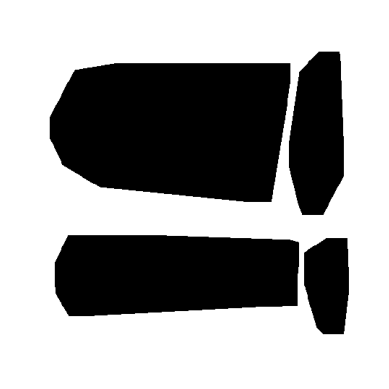

Image pixel values range from 0.24705882 to 1.0
Label pixel values range from 0.0 to 1.0


In [10]:
for images, labels in image_ds.take(1):
    image = labels[0].numpy()  # Convert the first image tensor to a numpy array

    # Depending on the image data, you may need to normalize it
    if image.max() > 1.0:
        image = image / 255.0  # Normalize to [0, 1] if the values range from [0, 255]

    # If the image has more than 2 dimensions (e.g., color channels), ensure it's handled
    if image.ndim == 3 and image.shape[-1] == 1:
        image = image.squeeze(-1)  # Remove channel dimension if it's single-channel

    # Now use matplotlib to display the image
    plt.imshow(image, cmap='gray')  # 'cmap' is only needed if it's a grayscale image
    plt.axis('off')  # Hide axes
    plt.show()

    image = images[0].numpy()  # Convert the first image tensor to a numpy array
    label = labels[0].numpy()  # Convert the first label tensor to a numpy array

    print("Image pixel values range from", image.min(), "to", image.max())
    print("Label pixel values range from", label.min(), "to", label.max())

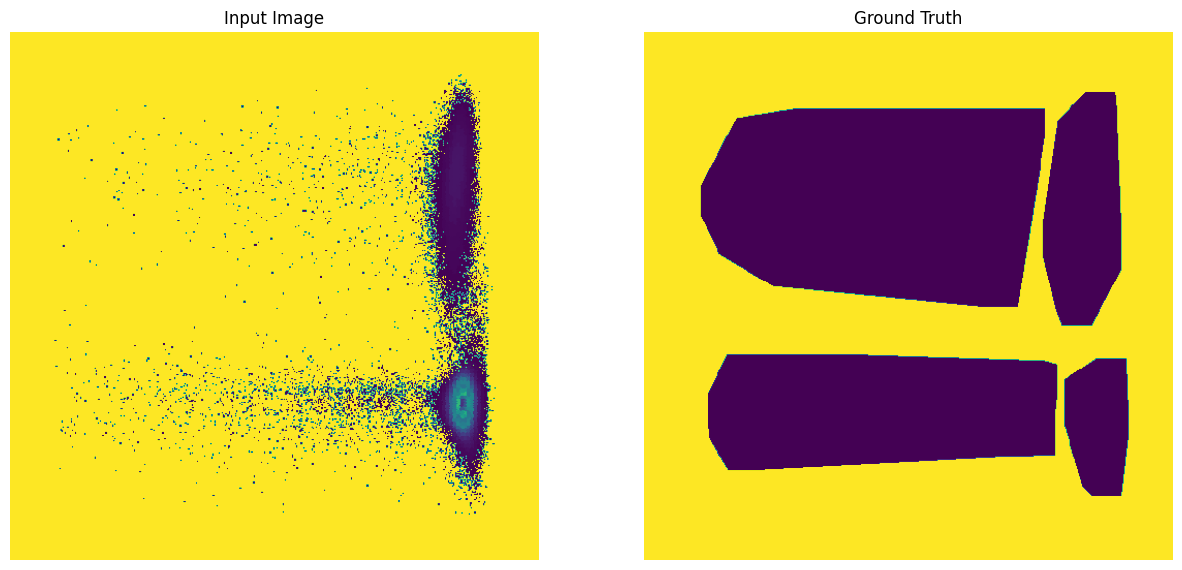

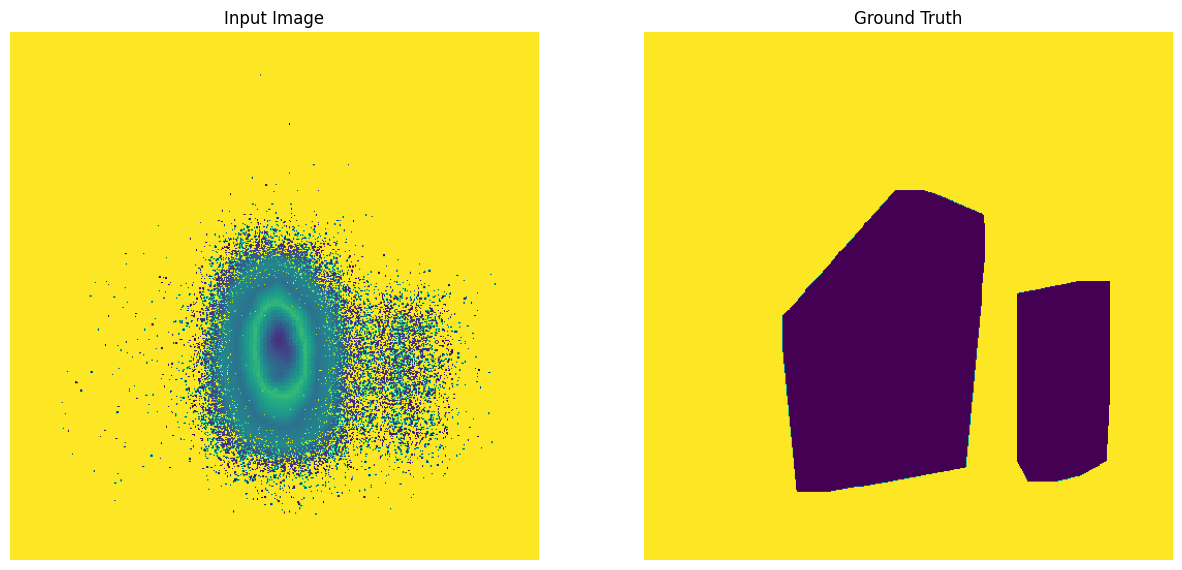

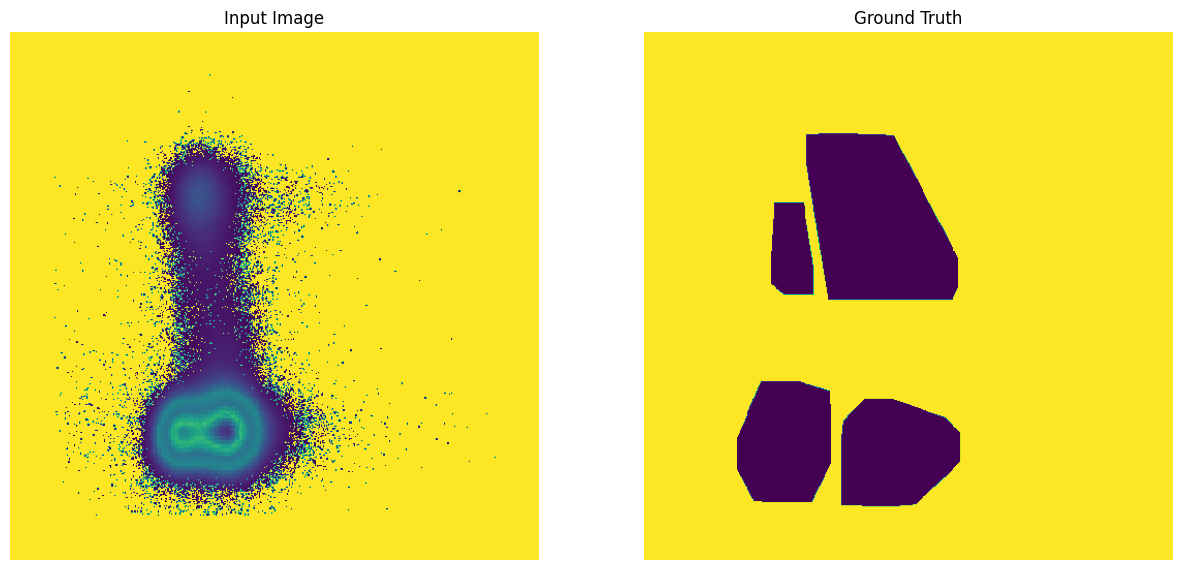

In [11]:
def generate_images(test_input, tar):
    plt.figure(figsize=(15, 15))

    display_list = [test_input[0], tar[0]]
    title = ['Input Image', 'Ground Truth']

    for i in range(2):
        plt.subplot(1, 2, i+1)
        plt.title(title[i])
        plt.imshow(display_list[i])
        plt.axis('off')
    plt.show()
    print()

for example_input, example_target in image_ds.take(3):
    generate_images(example_input, example_target)

In [12]:
with tf.device('device:GPU:0'):
    train_dataset, test_dataset = preprocessor.split_dataset(train_fraction=0.8)

In [13]:
OUTPUT_CHANNELS = 3

In [14]:
with tf.device('device:GPU:0'):
    rj_inp = preprocessor.show_tensor()[0]

In [15]:
def downsample(filters, size, apply_batchnorm=True):
    initializer = tf.random_normal_initializer(0., 0.02)

    result = tf.keras.Sequential()
    conv = tf.keras.layers.Conv2D(filters, size, strides=2, padding='same',
                             kernel_initializer=initializer, use_bias=False, 
                            )
    result.add(conv)

    if apply_batchnorm:
        result.add(tf.keras.layers.BatchNormalization())
    

    result.add(tf.keras.layers.LeakyReLU())

    return result

In [16]:
with tf.device('device:GPU:0'):
    down_model = downsample(1, 4)
    down_result = down_model(tf.expand_dims(tf.cast(rj_inp, dtype=tf.float32), 0))
    print (down_result.shape)

(1, 256, 256, 1)


In [17]:
def upsample(filters, size, apply_dropout=False):
    initializer = tf.random_normal_initializer(0., 0.02)

    result = tf.keras.Sequential()
    result.add(
        tf.keras.layers.Conv2DTranspose(filters, size, strides=2,
                                    padding='same', kernel_initializer=initializer,
                                    use_bias=False))

    result.add(tf.keras.layers.BatchNormalization())

    if apply_dropout:
        result.add(tf.keras.layers.Dropout(0.5))

    result.add(tf.keras.layers.ReLU())

    return result

In [18]:
with tf.device('device:GPU:0'):
    up_model = upsample(1, 4)
    up_result = up_model(down_result)
    print (up_result.shape)

(1, 512, 512, 1)


In [19]:
def Generator():
    inputs = tf.keras.layers.Input(shape=[512, 512, 1])

    down_stack = [
    downsample(64, 4, apply_batchnorm=False),
    downsample(128, 4),
    downsample(256, 4),
    downsample(512, 4), # remove if needed
    downsample(512, 4),
    downsample(512, 4),
    downsample(512, 4),
    downsample(512, 4),
  ]

    up_stack = [
    upsample(512, 4, apply_dropout=True),
    upsample(512, 4, apply_dropout=True),
    upsample(512, 4, apply_dropout=True),
    # upsample(512, 4, apply_dropout=True), # added an extra upsample layer
    upsample(512, 4),
    upsample(256, 4),
    upsample(128, 4),
    upsample(64, 4),
  ]

    initializer = tf.random_normal_initializer(0., 0.02)
    last = tf.keras.layers.Conv2DTranspose(OUTPUT_CHANNELS, 4,
                                         strides=2,
                                         padding='same',
                                         kernel_initializer=initializer,
                                         activation='tanh')
    x = inputs


    skips = []
    for down in down_stack:
        x = down(x)
        skips.append(x)

    skips = reversed(skips[:-1])

    for up, skip in zip(up_stack, skips):
        x = up(x)
        x = tf.keras.layers.Concatenate()([x, skip])

    x = last(x)

    return tf.keras.Model(inputs=inputs, outputs=x)

In [20]:
with tf.device('device:GPU:0'):
    OUTPUT_CHANNELS = 1
    generator = Generator()

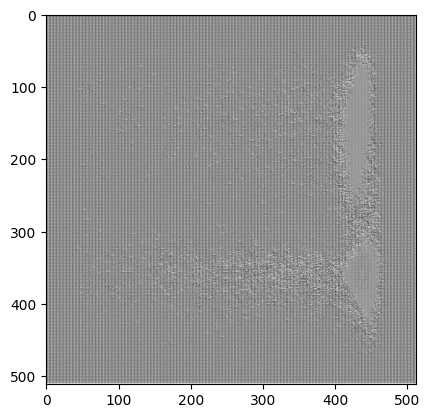

In [21]:
with tf.device('device:GPU:0'):
    gen_output = generator(rj_inp[tf.newaxis, ...], training=False)
    plt.imshow(gen_output[0, ...], cmap = 'Greys')

In [22]:
with tf.device('device:GPU:0'):
    LAMBDA = 100

In [33]:
with tf.device('device:GPU:0'):
    # , label_smoothing=0.1
    loss_object = tf.keras.losses.BinaryCrossentropy(from_logits=True)
def generator_loss(disc_generated_output, gen_output, target):
    gan_loss = loss_object(tf.ones_like(disc_generated_output), disc_generated_output)

    l1_loss = tf.reduce_mean(tf.abs(target - gen_output))

    total_gen_loss = gan_loss + (LAMBDA * l1_loss)

    return total_gen_loss, gan_loss, l1_loss

In [34]:
def Discriminator():
    initializer = tf.random_normal_initializer(0., 0.02)

    inp = tf.keras.layers.Input(shape=[512, 512, 1], name='input_image')
    tar = tf.keras.layers.Input(shape=[512, 512, 1], name='target_image')

    x = tf.keras.layers.concatenate([inp, tar])

    down1 = downsample(64, 4, False)(x)
    down2 = downsample(128, 4)(down1)
    down3 = downsample(256, 4)(down2)

    zero_pad1 = tf.keras.layers.ZeroPadding2D()(down3)
    conv = tf.keras.layers.Conv2D(512, 4, strides=1,
                                kernel_initializer=initializer,
                                use_bias=False)(zero_pad1)

    batchnorm1 = tf.keras.layers.BatchNormalization()(conv)

    leaky_relu = tf.keras.layers.LeakyReLU()(batchnorm1)

    zero_pad2 = tf.keras.layers.ZeroPadding2D()(leaky_relu)

    last = tf.keras.layers.Conv2D(1, 4, strides=1,
                                kernel_initializer=initializer)(zero_pad2)

    return tf.keras.Model(inputs=[inp, tar], outputs=last)

In [35]:
with tf.device('device:GPU:0'):
    discriminator = Discriminator()

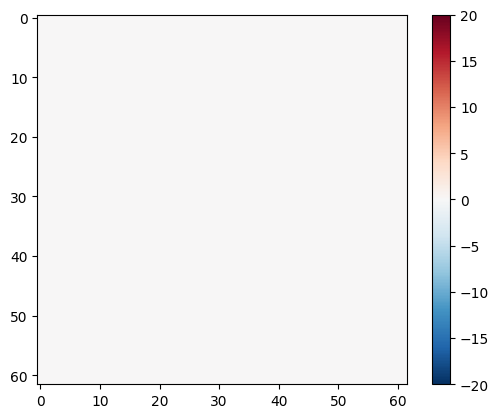

In [36]:
with tf.device('device:GPU:0'):
    disc_out = discriminator([rj_inp[tf.newaxis, ...], gen_output], training=False)
    plt.imshow(disc_out[0, ..., -1], vmin=-20, vmax=20, cmap='RdBu_r')
    plt.colorbar()

In [37]:
def discriminator_loss(disc_real_output, disc_generated_output):
    real_loss = loss_object(tf.ones_like(disc_real_output), disc_real_output)

    generated_loss = loss_object(tf.zeros_like(disc_generated_output), disc_generated_output)

    total_disc_loss = real_loss + generated_loss

    return total_disc_loss

In [38]:
with tf.device('device:GPU:0'):
    generator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
    discriminator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

In [39]:
with tf.device('device:GPU:0'):
    checkpoint_dir = './training_checkpoints'
    checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
    checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

In [40]:
def generate_images(model, test_input, tar):
    predictions = []
    display_list = []
    for i in range(len(test_input)):
        predictions.append(model(test_input[i], training=False)[0])
        display_list.append([test_input[i][0], tar[i][0], predictions[i]])

    plt.figure(figsize=(15, 15))
    title = ['Input Image', 'Ground Truth', 'Predicted Image']
    for j in range(len(test_input)):
        for i in range(3):
            plt.subplot(len(test_input), 3, j * 3 + i + 1)
            plt.title(title[i])
            plt.imshow(display_list[j][i] * 0.5 + 0.5, cmap = 'Greys')
            plt.axis('off')
    plt.show()

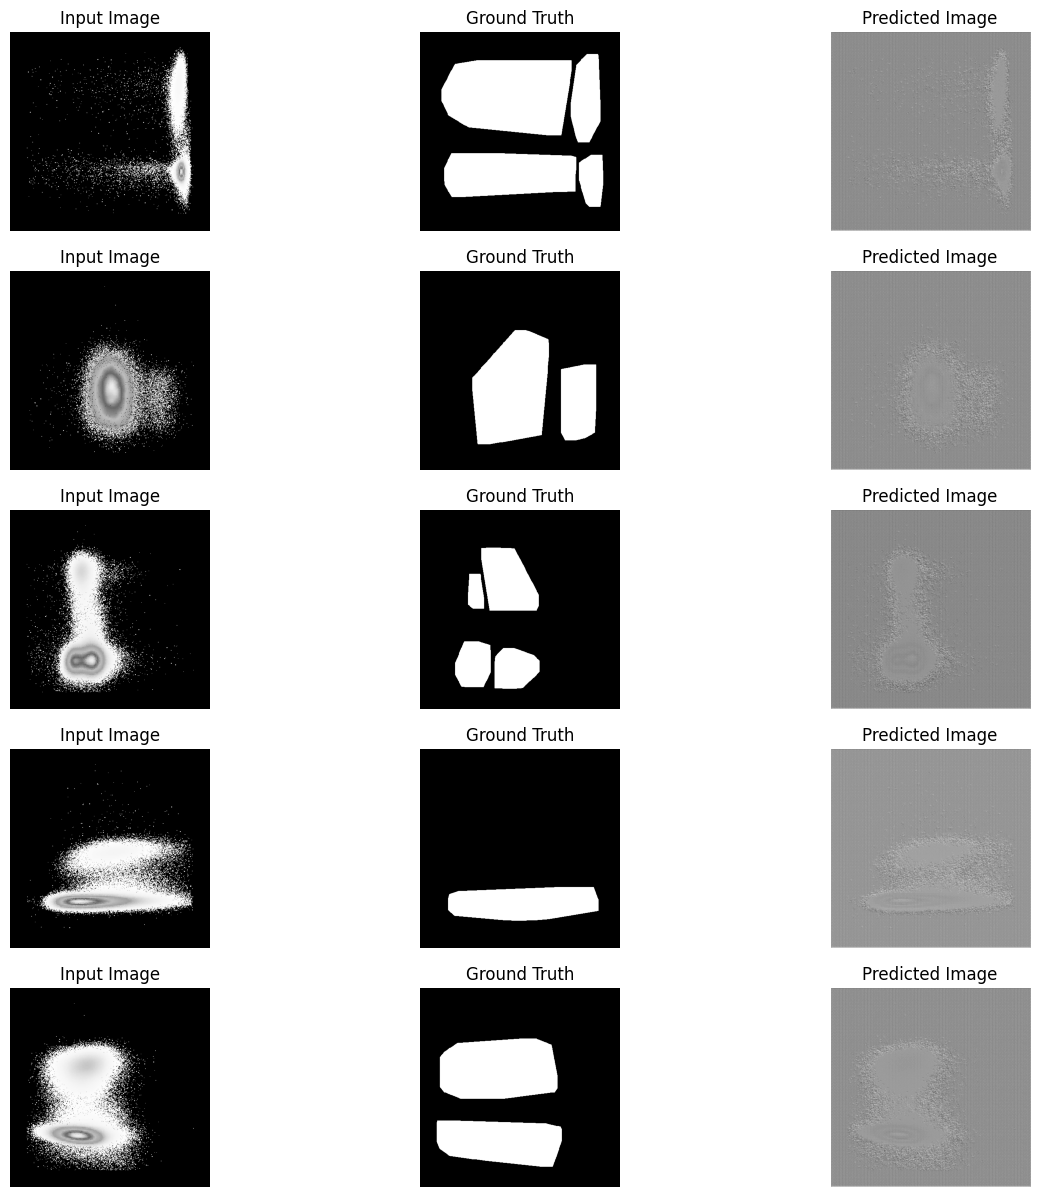

In [41]:
example_images = []
example_targets = []
for example_input, example_target in train_dataset.take(5):
    example_images.append(example_input)
    example_targets.append(example_target)

generate_images(generator, example_images, example_targets)

In [42]:
with tf.device('device:GPU:0'):
    log_dir="logs/"

    summary_writer = tf.summary.create_file_writer(
      log_dir + "fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

In [51]:
@tf.function
def train_step(input_image, target, step):
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        gen_output = generator(input_image, training=True)

        disc_real_output = discriminator([input_image, target], training=True)
        disc_generated_output = discriminator([input_image, gen_output], training=True)

        gen_total_loss, gen_gan_loss, gen_l1_loss = generator_loss(disc_generated_output, gen_output, target)
        disc_loss = discriminator_loss(disc_real_output, disc_generated_output)

    generator_gradients = gen_tape.gradient(gen_total_loss,
                                          generator.trainable_variables)
    discriminator_gradients = disc_tape.gradient(disc_loss,
                                               discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(generator_gradients,
                                          generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(discriminator_gradients,
                                              discriminator.trainable_variables))

    with summary_writer.as_default():
        tf.summary.scalar('gen_total_loss', gen_total_loss, step=step//1000)
        tf.summary.scalar('gen_gan_loss', gen_gan_loss, step=step//1000)
        tf.summary.scalar('gen_l1_loss', gen_l1_loss, step=step//1000)
        tf.summary.scalar('disc_loss', disc_loss, step=step//1000)

In [52]:
from tqdm import tqdm

In [53]:
def fit(train_ds, test_ds, steps):
    example_images = []
    example_targets = []
    for example_input, example_target in train_dataset.take(5):
        example_images.append(example_input)
        example_targets.append(example_target)
    start = time.time()

    for step, (input_image, target) in tqdm(train_ds.repeat().take(steps).enumerate()):
        if (step) % 1000 == 0:
            display.clear_output(wait=True)

            if step != 0:
                print(f'Time taken for 1000 steps: {time.time()-start:.2f} sec\n')

            start = time.time()

            generate_images(generator, example_images, example_targets)
            print(f"Step: {step//1000}k")

        train_step(input_image, target, step)

    # Training step
        if (step+1) % 10 == 0:
            print('.', end='', flush=True)


    # Save (checkpoint) the model every 5k steps
        if (step + 1) % 1000 == 0:
            checkpoint.save(file_prefix=checkpoint_prefix)

- first test: label smoothing to combat mode collapse -- on both gen and disc
    - looks like did not result in mode collapse, more varied results
    - not very good results
    - might have to change how the dataset labels are constructed, the bad labels seem to give really bad results 
    - especially compared to what is possible with the ones trained on the golden solution
- other tests well see
- have to try with wider layers and more layers
- can also 


- second test l2 regularization on both upsample and downsample penalize large weights
    - l2 reg resulted in mode collapse -- rlly bad!

- removing layers
    - 2 on gen downsample was too many
    - maybe less next time
 
 - one sided label smoothing on discriminator only
     - to avoid overconfidence of strictly 0/1
     - somehow terrible???



- on clean dataset
    - the original model did not produce good results



Time taken for 1000 steps: 216.09 sec



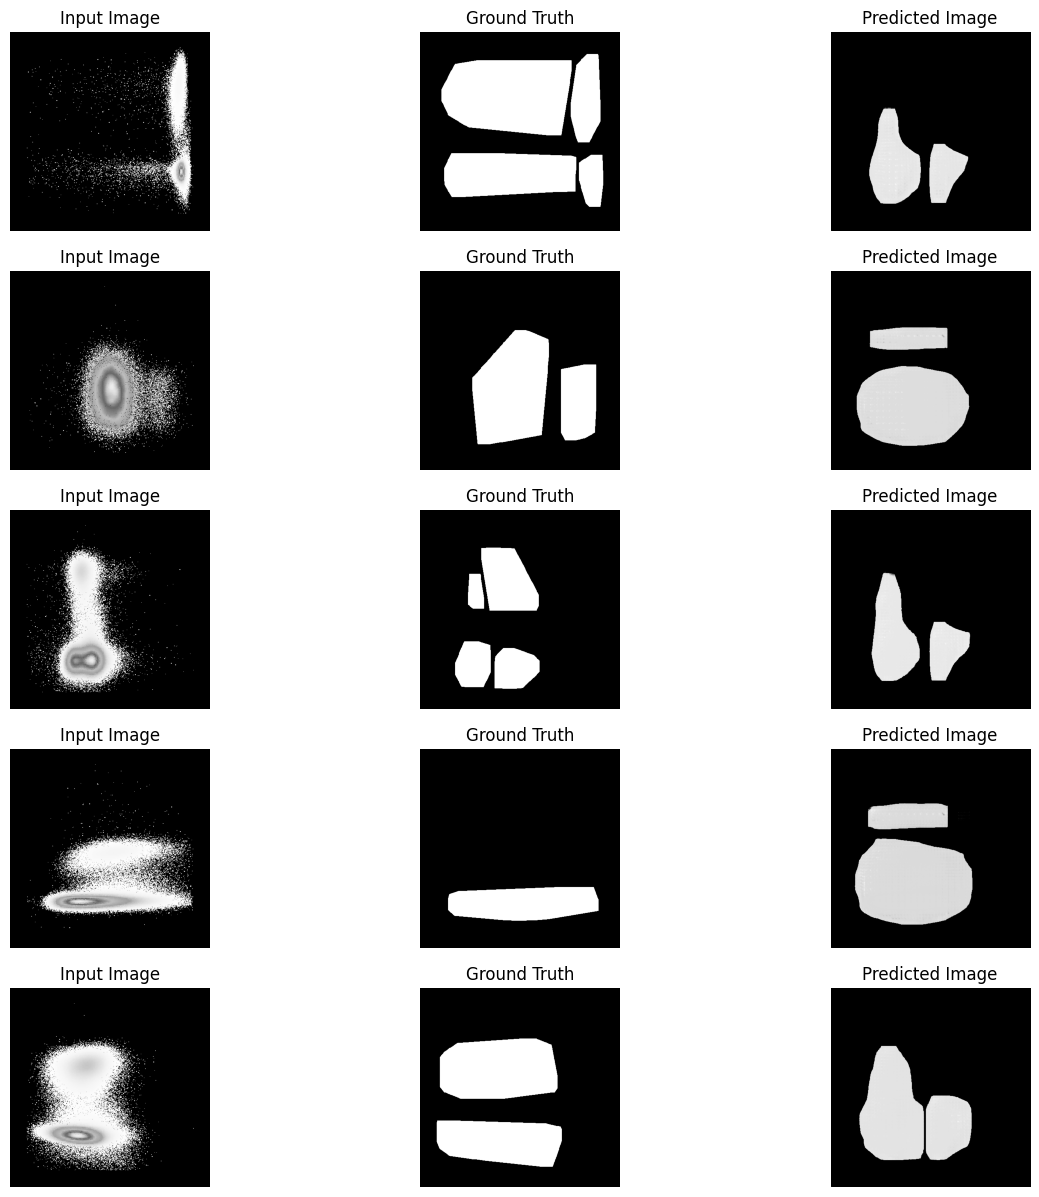

 99%|█████████▉| 99001/100000 [6:02:51<18:31,  1.11s/it]

Step: 99k


 99%|█████████▉| 99009/100000 [6:02:53<04:21,  3.79it/s]

.

 99%|█████████▉| 99019/100000 [6:02:55<03:30,  4.66it/s]

.

 99%|█████████▉| 99029/100000 [6:02:57<03:26,  4.70it/s]

.

 99%|█████████▉| 99039/100000 [6:02:59<03:24,  4.71it/s]

.

 99%|█████████▉| 99049/100000 [6:03:01<03:21,  4.71it/s]

.

 99%|█████████▉| 99059/100000 [6:03:03<03:19,  4.71it/s]

.

 99%|█████████▉| 99069/100000 [6:03:05<03:17,  4.71it/s]

.

 99%|█████████▉| 99079/100000 [6:03:07<03:15,  4.71it/s]

.

 99%|█████████▉| 99089/100000 [6:03:10<03:13,  4.71it/s]

.

 99%|█████████▉| 99099/100000 [6:03:12<03:10,  4.73it/s]

.

 99%|█████████▉| 99109/100000 [6:03:14<03:09,  4.70it/s]

.

 99%|█████████▉| 99119/100000 [6:03:16<03:06,  4.72it/s]

.

 99%|█████████▉| 99129/100000 [6:03:18<03:04,  4.72it/s]

.

 99%|█████████▉| 99139/100000 [6:03:20<03:02,  4.72it/s]

.

 99%|█████████▉| 99149/100000 [6:03:22<03:00,  4.71it/s]

.

 99%|█████████▉| 99159/100000 [6:03:24<02:58,  4.71it/s]

.

 99%|█████████▉| 99169/100000 [6:03:27<02:56,  4.71it/s]

.

 99%|█████████▉| 99179/100000 [6:03:29<02:54,  4.71it/s]

.

 99%|█████████▉| 99189/100000 [6:03:31<02:51,  4.72it/s]

.

 99%|█████████▉| 99199/100000 [6:03:33<02:50,  4.71it/s]

.

 99%|█████████▉| 99209/100000 [6:03:35<02:47,  4.71it/s]

.

 99%|█████████▉| 99219/100000 [6:03:37<02:45,  4.73it/s]

.

 99%|█████████▉| 99229/100000 [6:03:39<02:43,  4.70it/s]

.

 99%|█████████▉| 99239/100000 [6:03:41<02:41,  4.71it/s]

.

 99%|█████████▉| 99249/100000 [6:03:43<02:39,  4.69it/s]

.

 99%|█████████▉| 99259/100000 [6:03:46<02:37,  4.72it/s]

.

 99%|█████████▉| 99269/100000 [6:03:48<02:35,  4.70it/s]

.

 99%|█████████▉| 99279/100000 [6:03:50<02:32,  4.72it/s]

.

 99%|█████████▉| 99289/100000 [6:03:52<02:30,  4.73it/s]

.

 99%|█████████▉| 99299/100000 [6:03:54<02:28,  4.72it/s]

.

 99%|█████████▉| 99309/100000 [6:03:56<02:26,  4.72it/s]

.

 99%|█████████▉| 99319/100000 [6:03:58<02:23,  4.73it/s]

.

 99%|█████████▉| 99329/100000 [6:04:00<02:21,  4.75it/s]

.

 99%|█████████▉| 99339/100000 [6:04:03<02:20,  4.71it/s]

.

 99%|█████████▉| 99349/100000 [6:04:05<02:17,  4.73it/s]

.

 99%|█████████▉| 99359/100000 [6:04:07<02:16,  4.70it/s]

.

 99%|█████████▉| 99369/100000 [6:04:09<02:13,  4.72it/s]

.

 99%|█████████▉| 99379/100000 [6:04:11<02:11,  4.71it/s]

.

 99%|█████████▉| 99389/100000 [6:04:13<02:10,  4.69it/s]

.

 99%|█████████▉| 99399/100000 [6:04:15<02:07,  4.70it/s]

.

 99%|█████████▉| 99409/100000 [6:04:17<02:05,  4.71it/s]

.

 99%|█████████▉| 99419/100000 [6:04:20<02:03,  4.71it/s]

.

 99%|█████████▉| 99429/100000 [6:04:22<02:01,  4.70it/s]

.

 99%|█████████▉| 99439/100000 [6:04:24<01:59,  4.71it/s]

.

 99%|█████████▉| 99449/100000 [6:04:26<01:57,  4.71it/s]

.

 99%|█████████▉| 99459/100000 [6:04:28<01:54,  4.71it/s]

.

 99%|█████████▉| 99469/100000 [6:04:30<01:52,  4.72it/s]

.

 99%|█████████▉| 99479/100000 [6:04:32<01:50,  4.72it/s]

.

 99%|█████████▉| 99489/100000 [6:04:34<01:48,  4.73it/s]

.

 99%|█████████▉| 99499/100000 [6:04:37<01:45,  4.73it/s]

.

100%|█████████▉| 99509/100000 [6:04:39<01:44,  4.71it/s]

.

100%|█████████▉| 99519/100000 [6:04:41<01:41,  4.72it/s]

.

100%|█████████▉| 99529/100000 [6:04:43<01:39,  4.72it/s]

.

100%|█████████▉| 99539/100000 [6:04:45<01:38,  4.70it/s]

.

100%|█████████▉| 99549/100000 [6:04:47<01:35,  4.72it/s]

.

100%|█████████▉| 99559/100000 [6:04:49<01:33,  4.72it/s]

.

100%|█████████▉| 99569/100000 [6:04:51<01:31,  4.70it/s]

.

100%|█████████▉| 99579/100000 [6:04:53<01:29,  4.72it/s]

.

100%|█████████▉| 99589/100000 [6:04:56<01:27,  4.71it/s]

.

100%|█████████▉| 99599/100000 [6:04:58<01:24,  4.73it/s]

.

100%|█████████▉| 99609/100000 [6:05:00<01:22,  4.72it/s]

.

100%|█████████▉| 99619/100000 [6:05:02<01:20,  4.71it/s]

.

100%|█████████▉| 99629/100000 [6:05:04<01:18,  4.71it/s]

.

100%|█████████▉| 99639/100000 [6:05:06<01:16,  4.71it/s]

.

100%|█████████▉| 99649/100000 [6:05:08<01:14,  4.72it/s]

.

100%|█████████▉| 99659/100000 [6:05:10<01:12,  4.71it/s]

.

100%|█████████▉| 99669/100000 [6:05:13<01:10,  4.72it/s]

.

100%|█████████▉| 99679/100000 [6:05:15<01:08,  4.72it/s]

.

100%|█████████▉| 99689/100000 [6:05:17<01:05,  4.71it/s]

.

100%|█████████▉| 99699/100000 [6:05:19<01:03,  4.72it/s]

.

100%|█████████▉| 99709/100000 [6:05:21<01:01,  4.71it/s]

.

100%|█████████▉| 99719/100000 [6:05:23<00:59,  4.72it/s]

.

100%|█████████▉| 99729/100000 [6:05:25<00:57,  4.72it/s]

.

100%|█████████▉| 99739/100000 [6:05:27<00:55,  4.71it/s]

.

100%|█████████▉| 99749/100000 [6:05:30<00:53,  4.71it/s]

.

100%|█████████▉| 99759/100000 [6:05:32<00:50,  4.73it/s]

.

100%|█████████▉| 99769/100000 [6:05:34<00:49,  4.70it/s]

.

100%|█████████▉| 99779/100000 [6:05:36<00:46,  4.73it/s]

.

100%|█████████▉| 99789/100000 [6:05:38<00:44,  4.70it/s]

.

100%|█████████▉| 99799/100000 [6:05:40<00:42,  4.72it/s]

.

100%|█████████▉| 99809/100000 [6:05:42<00:40,  4.72it/s]

.

100%|█████████▉| 99819/100000 [6:05:44<00:38,  4.70it/s]

.

100%|█████████▉| 99829/100000 [6:05:47<00:36,  4.72it/s]

.

100%|█████████▉| 99839/100000 [6:05:49<00:34,  4.71it/s]

.

100%|█████████▉| 99849/100000 [6:05:51<00:32,  4.71it/s]

.

100%|█████████▉| 99859/100000 [6:05:53<00:29,  4.71it/s]

.

100%|█████████▉| 99869/100000 [6:05:55<00:27,  4.73it/s]

.

100%|█████████▉| 99879/100000 [6:05:57<00:25,  4.71it/s]

.

100%|█████████▉| 99889/100000 [6:05:59<00:23,  4.72it/s]

.

100%|█████████▉| 99899/100000 [6:06:01<00:21,  4.72it/s]

.

100%|█████████▉| 99909/100000 [6:06:03<00:19,  4.72it/s]

.

100%|█████████▉| 99919/100000 [6:06:06<00:17,  4.73it/s]

.

100%|█████████▉| 99929/100000 [6:06:08<00:15,  4.72it/s]

.

100%|█████████▉| 99939/100000 [6:06:10<00:12,  4.72it/s]

.

100%|█████████▉| 99949/100000 [6:06:12<00:10,  4.71it/s]

.

100%|█████████▉| 99959/100000 [6:06:14<00:08,  4.74it/s]

.

100%|█████████▉| 99969/100000 [6:06:16<00:06,  4.73it/s]

.

100%|█████████▉| 99979/100000 [6:06:18<00:04,  4.71it/s]

.

100%|█████████▉| 99989/100000 [6:06:20<00:02,  4.72it/s]

.

100%|█████████▉| 99999/100000 [6:06:23<00:00,  4.72it/s]

.

100%|██████████| 100000/100000 [6:06:24<00:00,  4.55it/s]


In [54]:
with tf.device('device:GPU:0'):
    fit(train_dataset, train_dataset, steps=100000)

In [262]:
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer, discriminator_optimizer=discriminator_optimizer, generator=generator, discriminator=discriminator)
# checkpoint_dir = './training_checkpoints'
checkpoint_path = tf.train.latest_checkpoint("training_checkpoints")
# checkpoints = [os.path.join(checkpoint_dir, name) for name in os.listdir(checkpoint_dir)]
checkpoint.restore(checkpoint_path)
# print("Restored from", checkpoints[-1])

In [29]:
tf.saved_model.save(generator, '/content/drive/MyDrive/model_gan_cytometry')

KeyboardInterrupt: 

In [34]:
print('Done~')

Done~


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [59]:
for inp, tar in test_dataset.take(5):
    print(inp)
    print(tar)
    generate_images(generator, inp, tar)

In [ ]:
print('11')

11


In [86]:
for example_input, example_target in test_dataset.take(1):
    generate_images(generator, example_input, example_target)

In [157]:
test_dataset

<SkipDataset element_spec=(TensorSpec(shape=(None, 512, 512, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 512, 512, 1), dtype=tf.float32, name=None))>

In [158]:
train_dataset

<TakeDataset element_spec=(TensorSpec(shape=(None, 512, 512, 1), dtype=tf.float32, name=None), TensorSpec(shape=(None, 512, 512, 1), dtype=tf.float32, name=None))>

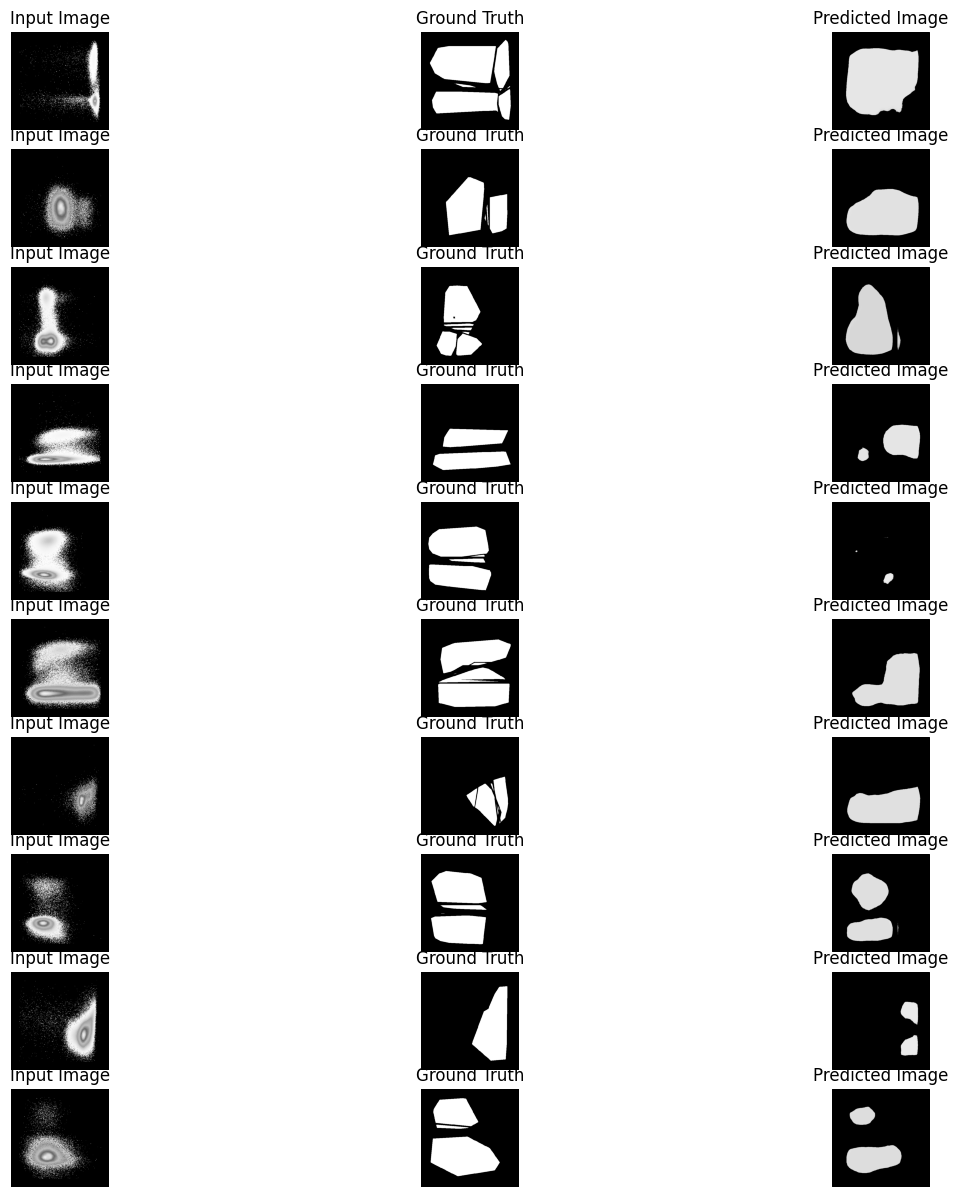

In [263]:
example_images = []
example_targets = []
for example_input, example_target in train_dataset.take(10):
    example_images.append(example_input)
    example_targets.append(example_target)

generate_images(generator, example_images, example_targets)